# How to Survive an Encounter with Pandas and Python 

---

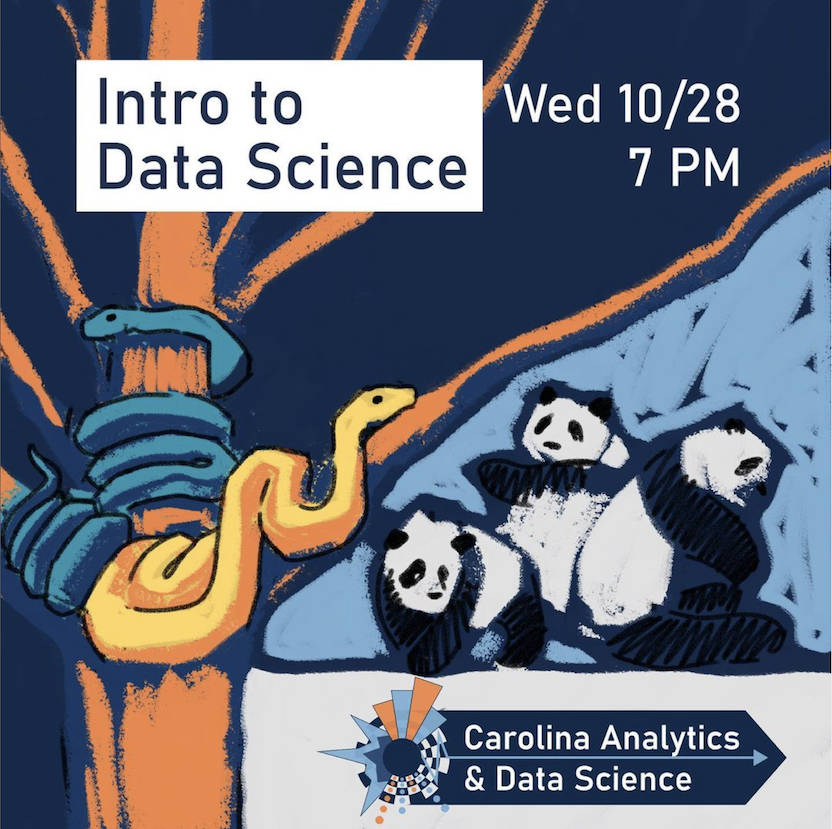

# Introduction

## What is Data Science?

Data Science is the discipline of reading and manipulating data to extract meaningful insights. The field is one of the most rapidly growing today and has applications in fields like Finance, Healthcare, and Natural Sciences, not to mention its growth in industry. IBM has projected a 2.7 million job growth in Data Science and Data Analytics (https://www.ibm.com/downloads/cas/3RL3VXGA) and the Bureau of Labor and Statistics considers data science one of the top 20 fastest growing occupations (https://www.bls.gov/ooh/fastest-growing.htm). 

## What is Python?

Python is a high-level programming language that is used in data science projects due to its clear, concise nature and the numerous libraries/frameworks available to its users. Among these is <b>Pandas</b>. 

Linked below is a cheatsheet of python commands for anyone who needs to brush up on their skills:
http://datacamp-community-prod.s3.amazonaws.com/0eff0330-e87d-4c34-88d5-73e80cb955f2

## What is Pandas?

Pandas is a data analysis tool that allows for easy import and manipulation of data. It's really easy to use, and we'll cover the basics of how to get Pandas up and running. If you have familiarity with Excel, a lot of Pandas concepts should seem familiar. 


In [2]:
# Importing the Pandas Library

import pandas as pd # Labeling this as pd is a standard practice. 

# Dataframes

The basic structure for storing data in pandas is known as a <b>dataframe</b>. You can think of dataframes as tables of data that you can then start playing with and manipulating. To create a dataframe, we can use a similar structure as a dictionary. Each column name can be considered a sort of key, while the observations within that column can be viewed as values. Pandas takes this structure and interprets it as a dataframe, which is a data type in and of itself. 


In [3]:
# Inititalize a new 3x3 Dataframe
df = pd.DataFrame({"Col1": [1, 2, 3],
                  "Col2": [4, 5, 6],
                  "Col3": [7, 8, 9]})

# Print dataframe
print("This is the printed dataframe:")
print(df)

# Just showing the dataframe
print("\nThis is a Pandas dataframe:")
df

This is the printed dataframe:
   Col1  Col2  Col3
0     1     4     7
1     2     5     8
2     3     6     9

This is a Pandas dataframe:


,Col1,Col2,Col3
0,1,4,7
1,2,5,8
2,3,6,9


# Reading in External Data

Often, you will be working with data that is already available. With this, you will need to know how to import data and how to begin working with it. For today's lesson, we will be using two datasets. One consists of information on a number of universities and the other contains information about the types of students at each institution. 

The datasets can be found here: [GitHub](https://github.com/CarolinaDataScience/Workshops2021/tree/main/An%20Encounter%20With%20Pythons%20and%20Pandas). Please download **cc_institution_details.cvs** and **grad_details.csv** and put them into your Google Drive. Then copy the file path for each of those files and paste it in the parentheses below. The areas are marked. 

---
While we are using slightly modified files for today's case, the original datasets can be found here: https://data.world/databeats/college-completion. 

In [5]:
# Loading in the actual data. Please input the direct path from your drive. 
cc_institution_details = pd.read_csv('cc_institution_details.csv', encoding = "ISO-8859-1") 
cc_institution_grads = pd.read_csv('cc_institution_grads.csv')

# Quick Look At The Data

Once the data is loaded in, it is good to take a look at a snapshot of the dataframe. To do this, we use the function **head()**.

In [6]:
cc_institution_details.head()

,unitid,chronname,city,state,level,control,basic,hbcu,flagship,long_x,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,-86.568502,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,-86.809170,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,-86.174010,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,-86.638420,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,-86.295677,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


### Try it on your own!

Try to show the head of our second dataframe **cc_institution_grads**.

In [7]:
# Please enter your solution here.

In [8]:
# Possible Solution

cc_institution_grads.head()

,unitid,year,gender,race,cohort,grad_cohort,grad_100,grad_150,grad_100_rate,grad_150_rate
0,100760,2011,B,X,2y all,446.0,73.0,105.0,16.4,23.5
1,100760,2011,M,X,2y all,185.0,NaN,40.0,NaN,21.6
2,100760,2011,F,X,2y all,261.0,NaN,65.0,NaN,24.9
3,100760,2011,B,W,2y all,348.0,NaN,86.0,NaN,24.7
4,100760,2011,M,W,2y all,162.0,NaN,35.0,NaN,21.6


# Checking Data Types

After we load in the data, and get a quick view of it, we should check the data types present in the dataframe. To do this we use the dtypes element that comes within Pandas. 

In [9]:
# Checking data types. 
cc_institution_details.dtypes

unitid               int64
chronname           object
city                object
state               object
level               object
                    ...   
state_sector_ct      int64
carnegie_ct          int64
counted_pct         object
nicknames           object
cohort_size        float64
Length: 62, dtype: object

### Try it on your own!

Try to identify the data types in our second dataframe **cc_institution_grads**.

In [10]:
# Please enter your solution here.

In [11]:
# Possible Solution

cc_institution_grads.dtypes

unitid             int64
year               int64
gender            object
race              object
cohort            object
grad_cohort      float64
grad_100         float64
grad_150         float64
grad_100_rate    float64
grad_150_rate    float64
dtype: object

# Selecting Columns Of Interest

It is good practice to narrow down your dataset according to the needs of your project. This keeps outside information more safely maintained and is a more ethical approach to data science. First, we will use **columns** to see the columns in the dataset. From here, we can then select certain columns that we will use in our analyses. 

In [12]:
# Viewing the columns. 
cc_institution_details.columns

Index(['unitid', 'chronname', 'city', 'state', 'level', 'control', 'basic',
       'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
       'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first',
       'vsa

In [13]:
# Selecting Columns of Interest.
cc_institution_details = cc_institution_details[['unitid', 'chronname', 'city', 'state', 'level', 'hbcu',
                                  'long_x', 'lat_y', 'site', 'student_count', 'med_sat_value', 
                                  'aid_value', 'endow_value', ]]

In [14]:
# Checking columns of our second dataset.
cc_institution_grads.columns

# Since this dataset has already been prepared, we do not need to select out any columns because it has already been done. 

Index(['unitid', 'year', 'gender', 'race', 'cohort', 'grad_cohort', 'grad_100',
       'grad_150', 'grad_100_rate', 'grad_150_rate'],
      dtype='object')

# Checking for Nulls

Now that we have our columns of interest, we can check for missing data. One way to do this is to use the **isnull()** function and the **sum()** function built within Pandas. This will give us a list of missing values for each column in our dataset. 

In [15]:
cc_institution_details.isnull().sum()

unitid              0
chronname           0
city                0
state               0
level               0
hbcu             3704
long_x              0
lat_y               0
site               19
student_count       0
med_sat_value    2461
aid_value           1
endow_value      1475
dtype: int64

### Try it on your own!

Try to identify the number of nulls in our second dataframe **cc_institution_grads**.

In [ ]:
# Please enter your solution here. 

In [16]:
# Possible Solution

cc_institution_grads.isnull().sum()

unitid                0
year                  0
gender                0
race                  0
cohort                0
grad_cohort      412722
grad_100         892033
grad_150         412722
grad_100_rate    970041
grad_150_rate    607233
dtype: int64

# Dropping Nulls

Now that we have checked our data, we can see that there are missing values within our first dataset, so we should probably clean that up. For today's case, we are just going to remove any null values. We want to remove the entire observation, or row, so that they do not affect our analyses later on. There are a number of other ways to address missing data including interpolation and extrapolation. 

To make sure that we are only removing data that needs to be removed, and that are not removing data will-nilly, we will want to identify particular columns. This prevents us from removing too much data. For example, we may not want to remove data just because it is missing an HBCU status or a website url, but we would want to remove observations if they are missing a student count or a median SAT value. So, we select the columns to check to make sure we are not dropping things unecessarily. 

Lastly, we also want to use the **inplace** parameter to make changes to our existing dataset. The default value for this is False. If we have this set to false, we need to assign the returned dataframe to a value otherwise the updated version would not be preserved. 

In [17]:
cc_institution_details.dropna(subset=['student_count', 'med_sat_value', 'aid_value', 'endow_value'], inplace=True)

# Joining Datasets

Now that we have our datasets cleaned up, we can work to merge them together. To do this, we use the **merge()** function that is built within Pandas. We specify the data to be joined, the type of join that we will be doing, and the column(s) that match the two dataframes. Including all of this information is generally considered good practice. 

Now, there are a number of different joins that we could do. The chart below shows them. For this instance, we want to preserve all of the schools, and thier respective information, in our dataset, rather than preserving all of the data on graduates. Therefore, we will be doing a left join, attaching our grads information onto our details information. 

![](https://i1.wp.com/datascienceexamples.com/wp-content/uploads/2019/12/join_types.png?fit=840%2C788&ssl=1)

In [18]:
combined_df = cc_institution_details.merge(cc_institution_grads, how='left', on='unitid')

In [19]:
combined_df.head()

,unitid,chronname,city,state,level,hbcu,long_x,lat_y,site,student_count,...,endow_value,year,gender,race,cohort,grad_cohort,grad_100,grad_150,grad_100_rate,grad_150_rate
0,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,NaN,-86.80917,33.50223,www.uab.edu,11502,...,24136.0,2011,B,X,4y other,1.0,NaN,1.0,NaN,100.0
1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,NaN,-86.80917,33.50223,www.uab.edu,11502,...,24136.0,2011,M,X,4y other,0.0,NaN,0.0,NaN,NaN
2,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,NaN,-86.80917,33.50223,www.uab.edu,11502,...,24136.0,2011,F,X,4y other,1.0,NaN,1.0,NaN,100.0
3,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,NaN,-86.80917,33.50223,www.uab.edu,11502,...,24136.0,2011,B,W,4y other,1.0,NaN,1.0,NaN,100.0
4,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,NaN,-86.80917,33.50223,www.uab.edu,11502,...,24136.0,2011,M,W,4y other,0.0,NaN,0.0,NaN,NaN


# Min, Max, Median

Now that we have our data combined, we can begin looking at some descriptive statistics and getting a feel for our dataset. First, lets look at the min, max, and median using the functions **min()**, **max()**, and **median()**. These are super simple statistics but are very often used, so its good to be familiar with these functions and their use. 

In [20]:
min = combined_df['student_count'].min()
print("Min:", min)

max = combined_df['student_count'].max()
print("Max:", max)

median = combined_df['student_count'].median()
print("Median:", median)

Min: 85
Max: 51333
Median: 2653.0


In [21]:
min = combined_df['med_sat_value'].min()
print("Min:", min)

max = combined_df['med_sat_value'].max()
print("Max:", max)

median = combined_df['med_sat_value'].median()
print("Median:", median)

Min: 666.0
Max: 1534.0
Median: 1046.0


### Try it on your own!

Try to identify the min, max, and median for the columns **aid_value** and **endow_value**.

In [ ]:
# Please enter your solution here.

In [22]:
# Possible Solution

aid_min = combined_df['aid_value'].min()
print("Aid Min:", aid_min)

aid_max = combined_df['aid_value'].max()
print("Aid Max:", aid_max)

aid_median = combined_df['aid_value'].median()
print("Aid Median:", aid_median)

endow_min = combined_df['endow_value'].min()
print("Endowment Min:", endow_min)

endow_max = combined_df['endow_value'].max()
print("Endowment Max:", endow_max)

endow_median = combined_df['endow_value'].median()
print("Endowment Median:", endow_median)

Aid Min: 1184.0
Aid Max: 41580.0
Aid Median: 11550.0
Endowment Min: 8.0
Endowment Max: 2505435.0
Endowment Median: 11549.0


# Sum and Average

Next, we can look at the sum and average using the functions **sum()** and **mean()**. Again, these are incredibly useful functions because they are very commonly employed. 

In [23]:
sum = combined_df['student_count'].sum()
print("Sum:", sum)

average = combined_df['student_count'].mean()
print("Mean:", average)

Sum: 3219472602
Mean: 5805.244693281402


In [24]:
sum = combined_df['med_sat_value'].sum()
print("Sum:", sum)

average = combined_df['med_sat_value'].mean()
print("Mean:", average)

Sum: 590040180.0
Mean: 1063.9406037000974


### Try it on your own!

Try to identify the sum and average for the columns **aid_value** and **endow_value**.

In [25]:
# Please enter your solution here.

In [26]:
# Possible Solution

aid_sum = combined_df['aid_value'].sum()
print("Aid Sum:", aid_sum)

aid_average = combined_df['aid_value'].mean()
print("Aid Mean:", aid_average)

endow_sum = combined_df['endow_value'].sum()
print("Endowment Sum:", endow_sum)

endow_average = combined_df['endow_value'].mean()
print("Endowment Mean:", endow_average)

Aid Sum: 7186868694.0
Aid Mean: 12959.119863680624
Endowment Sum: 27506638260.0
Endowment Mean: 49599.044790652384


# Standard Deviation and Quantiles


Lastly, we can take a look at the standard deviation and some initial quantile values. To do this we use the function **std()** to find the standard deviation, and the funtion **quantile()** to identify a quantile amount. 

In [27]:
std = combined_df['student_count'].std()
print("Standard Deviation:", std)

quant25 = combined_df['student_count'].quantile(.25)
print(".25 Quantile:", quant25)

quant75= combined_df['student_count'].quantile(.75)
print(".75 Quantile:", quant75)

Standard Deviation: 7436.66523855245
.25 Quantile: 1371.0
.75 Quantile: 6826.0


In [28]:
std = combined_df['med_sat_value'].std()
print("Standard Deviation:", std)

quant25 = combined_df['med_sat_value'].quantile(.25)
print(".25 Quantile:", quant25)

quant75= combined_df['med_sat_value'].quantile(.75)
print(".75 Quantile:", quant75)

Standard Deviation: 132.40267444155
.25 Quantile: 979.0
.75 Quantile: 1129.0


### Try it on your own!

Try to identify the standard deviation, the 25th Quantile, and the 75th Quantile for the columns **aid_value** and **endow_value**.

In [29]:
# Please enter your solution here.

In [30]:
# Possible Solution

aid_std = combined_df['aid_value'].std()
print("Aid Standard Deviation:", aid_std)

aid_quant25 = combined_df['aid_value'].quantile(.25)
print("Aid .25 Quantile:", aid_quant25)

aid_quant75= combined_df['aid_value'].quantile(.75)
print("Aid .75 Quantile:", aid_quant75)

endow_std = combined_df['endow_value'].std()
print("Endowment Standard Deviation:", endow_std)

endow_quant25 = combined_df['endow_value'].quantile(.25)
print("Endowment .25 Quantile:", endow_quant25)

endow_quant75= combined_df['endow_value'].quantile(.75)
print("Endowment .75 Quantile:", endow_quant75)

Aid Standard Deviation: 7521.400064613081
Aid .25 Quantile: 6810.0
Aid .75 Quantile: 16990.0
Endowment Standard Deviation: 157317.8131041594
Endowment .25 Quantile: 4392.0
Endowment .75 Quantile: 32802.0


# Basic Statistics

Now that we have gone through all of these initial descriptive statistics, we can highlight an easier way to get all of this information. There is a handy function within Pandas called **describe()** that gets basic statistics for all of the numerical columns in our dataframe. But, if we want to include all of the columns, and not just the numeric ones, we need to adjust the code a little bit by specifying **include='all'**. 

In [31]:
combined_df.describe()#include='all'

,unitid,long_x,lat_y,student_count,med_sat_value,aid_value,endow_value,year,grad_cohort,grad_100,grad_150,grad_100_rate,grad_150_rate
count,554580.000000,554580.000000,554580.000000,554580.000000,554580.000000,554580.000000,5.545800e+05,554580.000000,338544.000000,269671.000000,338544.000000,235200.000000,273022.000000
mean,183298.170594,-88.104483,38.565710,5805.244693,1063.940604,12959.119864,4.959904e+04,2007.511392,153.371373,69.396717,89.305213,32.671212,47.960190
std,44776.699905,14.321944,4.605921,7436.665239,132.402674,7521.400065,1.573178e+05,3.455335,424.340120,210.370415,285.005395,27.582230,28.577169
min,100663.000000,-158.062444,19.701854,85.000000,666.000000,1184.000000,8.000000e+00,2002.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,152381.000000,-93.743015,35.237657,1371.000000,979.000000,6810.000000,4.392000e+03,2005.000000,1.000000,0.000000,0.000000,9.900000,28.600000
50%,184694.000000,-84.551918,39.729862,2653.000000,1046.000000,11550.000000,1.154900e+04,2008.000000,10.000000,4.000000,4.000000,27.600000,50.000000
75%,214698.000000,-77.544068,41.746746,6826.000000,1129.000000,16990.000000,3.280200e+04,2011.000000,109.000000,44.000000,50.000000,50.000000,66.700000
max,462354.000000,-67.456534,61.191235,51333.000000,1534.000000,41580.000000,2.505435e+06,2013.000000,8533.000000,5243.000000,6859.000000,100.000000,100.000000


### Try it on your own!

Try to describe only the four columns that we have previously been working with, rather than the whole table. 

In [32]:
# Please enter your solution here.

In [33]:
# Possible Solution
combined_df[['student_count', 'med_sat_value',
             'aid_value', 'endow_value']].describe()


,student_count,med_sat_value,aid_value,endow_value
count,554580.000000,554580.000000,554580.000000,5.545800e+05
mean,5805.244693,1063.940604,12959.119864,4.959904e+04
std,7436.665239,132.402674,7521.400065,1.573178e+05
min,85.000000,666.000000,1184.000000,8.000000e+00
25%,1371.000000,979.000000,6810.000000,4.392000e+03
50%,2653.000000,1046.000000,11550.000000,1.154900e+04
75%,6826.000000,1129.000000,16990.000000,3.280200e+04
max,51333.000000,1534.000000,41580.000000,2.505435e+06


# Saving Files

Lastly, we want to save our combined dataframe so that we can use it for future analyses. To do this, we use the function to_csv(). Please fill in the data path below and save the file some place where you will ba able to locate it in the future. 

In [34]:
#combined_df.to_csv('combined_df.csv', index=False)

# Conclusions

This case introduced us to some basic Pandas concepts, but this is just a start. Pandas is incredibly powerful and innumerable applications. Data Science and Pandas go hand in hand and is crucial to a data science career today. 

In our next lesson, we will be continuing with this case and learning some more advanced techniques and approaches. Please come and check that out if you would like to go further and learn some more information. 

If you would like more information on Pandas, please check out the [documentation](https://pandas.pydata.org/docs/reference/index.html) which outlines all of the Pandas functions and their uses. 